# Text Analytics | BAIS:6100
# Module 3: Basic Natural Language Processing  - Exercises

Instructor: Kang-Pyo Lee

## Exercises - Basic NLP Techniques Using NLTK and TextBlob

Twitter hashtag options:
- ai
- bitcoin
- blacklivesmatter
- bts
- covid19
- fakenews
- innovation
- mentalhealth
- metoo
- startup

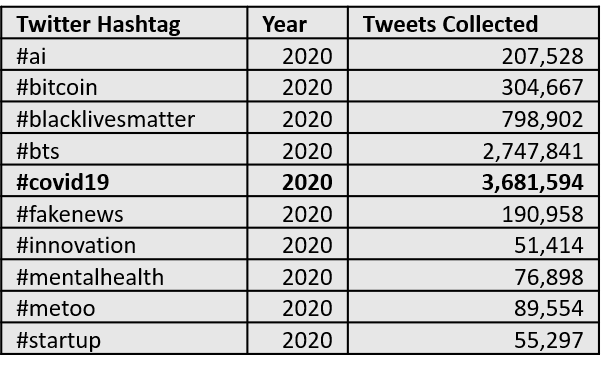

In [1]:
from IPython.display import Image
Image("classdata/images/data_hashtags.png")

Choose a Twitter hashtag you're interested in and save it in the `hashtag` variable below.

In [2]:
hashtag = "covid19"

Choose the number of tweets you want to randomly select from each month. 

In [3]:
N = 1000

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

months = ["202012", "202011", "202010", "202009", "202008", "202007", 
          "202006", "202005", "202004", "202003", "202002", "202001"]

df = pd.DataFrame()
for month in months:
    dftmp = pd.read_csv("classdata/tweets/tweets_{}_{}.csv".format(hashtag, month), sep="\t", quoting=3)
    
    ##############################################
    # Create a random sample of N rows.
    ##############################################
    if len(dftmp) > N:
        dftmp = dftmp.sample(n=N)
    ##############################################
    
    df = pd.concat([df, dftmp])
    print("{}: {:,}".format(month, len(dftmp)))

print("Total number of tweets in df: {:,}\n".format(len(df)))
df

202012: 1,000
202011: 1,000
202010: 1,000
202009: 1,000
202008: 1,000
202007: 1,000
202006: 1,000
202005: 1,000
202004: 1,000
202003: 1,000
202002: 1,000
202001: 0
Total number of tweets in df: 11,000



,created_at,user_screen_name,user_name,text
103087,Wed Dec 16 21:20:35 +0000 2020,LilithGeraldine,Geraldine,RT @crimethinc: Capitalism has always consumed the lives of workers for the sake of profits. #COVID19 just sped up the process. What used t…
175076,Wed Dec 02 12:46:49 +0000 2020,Rienye,Wilson Rienye,RT @MattOduor: @BritamEA launched #COVID19 insurance cover for passengers on @LittleRideKE. Commuters will pay Sh10/trip for personal accid…
108349,Wed Dec 16 01:53:24 +0000 2020,GinnyWitt4,Ginny Witt,"RT @Craig_A_Spencer: Tomorrow I’ll get vaccinated against #COVID19! You know what I’m gonna do right after?I’m gonna wear a mask, always.…"
39223,Sat Dec 26 19:55:29 +0000 2020,hhotz,Harald HotzBehofsits,"RT @DrEricDing: 📍Sobering—1 out of every 1,000 people living in the US 🇺🇸 has died of #COVID19–residents, not just among cases.330,000 ar…"
51487,Thu Dec 24 10:20:22 +0000 2020,MalkinJan,jan malkin,"RT @Zubhaque: There are 20,917 ppl currently in hospital with #COVID19. By tmrw, Christmas Day, there will be more covid patients in hospit…"
...,...,...,...,...
36972,Sat Feb 22 12:38:25 +0000 2020,viralvm69,viral mehta,"RT @XHNews: ""The window of opportunity (to contain the outbreak of #COVID19) may be closing,"" said @WHO chief, urging int'l community to ac…"
54258,Thu Feb 13 23:52:30 +0000 2020,WhienaLove,WhienaLove,"RT @globaltimesnews: “Let’s stand together in the fight against #COVID19,” Chinese singer-actor #ZhangYixing released a video demonstrating…"
39676,Fri Feb 21 14:18:02 +0000 2020,KAMALPRASANTH5,KAMAL PRASANTH,"RT @PDChina: Rencheng Prison in Shandong Province has reported 207 confirmed cases of #COVID19, 200 of whom are prisoners, as of Feb 20. Xi…"
12043,Fri Feb 28 06:29:11 +0000 2020,AwojobiSeun,Seun Awojobi,"RT @DrEOEhanire: The Federal Ministry of Health @FMoHNigeria has confirmed a coronavirus disease #COVID19 case in Lagos State.The case, wh…"


We need to explicitly convert the types of the two columns `user_name` and `text` to string, so we ensure that they are strings. 

In [5]:
df.user_name = df.user_name.astype(str)
df.text = df.text.astype(str)

pandas.Series.astype: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html

1\. Import the following modules:
- nltk
- ngrams from nltk.util
- TextBlob from textblob
- gender_guesser.detector as gender

In [6]:
# Your answer here
import nltk
from nltk.util import ngrams
from textblob import TextBlob
import gender_guesser.detector as gender

2\. Add two new columns `sentences` and `num_sentences` to `df`, such that 
- each value in the `sentences` column contains a list of sentences identified from the `text` column value 
- and each value in the `num_sentences` column contains the number of identified sentences. 

In [7]:
# Your answer here
df["sentences"] = df.text.apply(lambda x: nltk.sent_tokenize(x))
df["num_sentences"] = df.sentences.apply(lambda x: len(x))

In [8]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "sentences", "num_sentences"]]

,text,sentences,num_sentences
103087,RT @crimethinc: Capitalism has always consumed the lives of workers for the sake of profits. #COVID19 just sped up the process. What used t…,"[RT @crimethinc: Capitalism has always consumed the lives of workers for the sake of profits., #COVID19 just sped up the process., What used t…]",3
175076,RT @MattOduor: @BritamEA launched #COVID19 insurance cover for passengers on @LittleRideKE. Commuters will pay Sh10/trip for personal accid…,"[RT @MattOduor: @BritamEA launched #COVID19 insurance cover for passengers on @LittleRideKE., Commuters will pay Sh10/trip for personal accid…]",2
108349,"RT @Craig_A_Spencer: Tomorrow I’ll get vaccinated against #COVID19! You know what I’m gonna do right after?I’m gonna wear a mask, always.…","[RT @Craig_A_Spencer: Tomorrow I’ll get vaccinated against #COVID19!, You know what I’m gonna do right after?I’m gonna wear a mask, always.…]",2
39223,"RT @DrEricDing: 📍Sobering—1 out of every 1,000 people living in the US 🇺🇸 has died of #COVID19–residents, not just among cases.330,000 ar…","[RT @DrEricDing: 📍Sobering—1 out of every 1,000 people living in the US 🇺🇸 has died of #COVID19–residents, not just among cases.330,000 ar…]",1
51487,"RT @Zubhaque: There are 20,917 ppl currently in hospital with #COVID19. By tmrw, Christmas Day, there will be more covid patients in hospit…","[RT @Zubhaque: There are 20,917 ppl currently in hospital with #COVID19., By tmrw, Christmas Day, there will be more covid patients in hospit…]",2
...,...,...,...
36972,"RT @XHNews: ""The window of opportunity (to contain the outbreak of #COVID19) may be closing,"" said @WHO chief, urging int'l community to ac…","[RT @XHNews: ""The window of opportunity (to contain the outbreak of #COVID19) may be closing,"" said @WHO chief, urging int'l community to ac…]",1
54258,"RT @globaltimesnews: “Let’s stand together in the fight against #COVID19,” Chinese singer-actor #ZhangYixing released a video demonstrating…","[RT @globaltimesnews: “Let’s stand together in the fight against #COVID19,” Chinese singer-actor #ZhangYixing released a video demonstrating…]",1
39676,"RT @PDChina: Rencheng Prison in Shandong Province has reported 207 confirmed cases of #COVID19, 200 of whom are prisoners, as of Feb 20. Xi…","[RT @PDChina: Rencheng Prison in Shandong Province has reported 207 confirmed cases of #COVID19, 200 of whom are prisoners, as of Feb 20., Xi…]",2
12043,"RT @DrEOEhanire: The Federal Ministry of Health @FMoHNigeria has confirmed a coronavirus disease #COVID19 case in Lagos State.The case, wh…","[RT @DrEOEhanire: The Federal Ministry of Health @FMoHNigeria has confirmed a coronavirus disease #COVID19 case in Lagos State.The case, wh…]",1


3\. Add two new columns `words` and `num_words` to `df`, such that 
- each value in the `words` column contains a list of words identified from the `text` column value
- and each value in the `num_words` column contains the number of identified words. 

In [9]:
# Your answer here
df["words"] = df.text.apply(lambda x: nltk.word_tokenize(x))
df["num_words"] = df.words.apply(lambda x: len(x))

In [10]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "words", "num_words"]]

,text,words,num_words
103087,RT @crimethinc: Capitalism has always consumed the lives of workers for the sake of profits. #COVID19 just sped up the process. What used t…,"[RT, @, crimethinc, :, Capitalism, has, always, consumed, the, lives, of, workers, for, the, sake, of, profits, ., #, COVID19, just, sped, up, the...",29
175076,RT @MattOduor: @BritamEA launched #COVID19 insurance cover for passengers on @LittleRideKE. Commuters will pay Sh10/trip for personal accid…,"[RT, @, MattOduor, :, @, BritamEA, launched, #, COVID19, insurance, cover, for, passengers, on, @, LittleRideKE, ., Commuters, will, pay, Sh10/tri...",24
108349,"RT @Craig_A_Spencer: Tomorrow I’ll get vaccinated against #COVID19! You know what I’m gonna do right after?I’m gonna wear a mask, always.…","[RT, @, Craig_A_Spencer, :, Tomorrow, I, ’, ll, get, vaccinated, against, #, COVID19, !, You, know, what, I, ’, m, gon, na, do, right, after, ?, I...",36
39223,"RT @DrEricDing: 📍Sobering—1 out of every 1,000 people living in the US 🇺🇸 has died of #COVID19–residents, not just among cases.330,000 ar…","[RT, @, DrEricDing, :, 📍Sobering—1, out, of, every, 1,000, people, living, in, the, US, 🇺🇸, has, died, of, #, COVID19–residents, ,, not, just, amo...",26
51487,"RT @Zubhaque: There are 20,917 ppl currently in hospital with #COVID19. By tmrw, Christmas Day, there will be more covid patients in hospit…","[RT, @, Zubhaque, :, There, are, 20,917, ppl, currently, in, hospital, with, #, COVID19, ., By, tmrw, ,, Christmas, Day, ,, there, will, be, more,...",29
...,...,...,...
36972,"RT @XHNews: ""The window of opportunity (to contain the outbreak of #COVID19) may be closing,"" said @WHO chief, urging int'l community to ac…","[RT, @, XHNews, :, ``, The, window, of, opportunity, (, to, contain, the, outbreak, of, #, COVID19, ), may, be, closing, ,, '', said, @, WHO, chie...",35
54258,"RT @globaltimesnews: “Let’s stand together in the fight against #COVID19,” Chinese singer-actor #ZhangYixing released a video demonstrating…","[RT, @, globaltimesnews, :, “, Let, ’, s, stand, together, in, the, fight, against, #, COVID19, ,, ”, Chinese, singer-actor, #, ZhangYixing, relea...",26
39676,"RT @PDChina: Rencheng Prison in Shandong Province has reported 207 confirmed cases of #COVID19, 200 of whom are prisoners, as of Feb 20. Xi…","[RT, @, PDChina, :, Rencheng, Prison, in, Shandong, Province, has, reported, 207, confirmed, cases, of, #, COVID19, ,, 200, of, whom, are, prisone...",30
12043,"RT @DrEOEhanire: The Federal Ministry of Health @FMoHNigeria has confirmed a coronavirus disease #COVID19 case in Lagos State.The case, wh…","[RT, @, DrEOEhanire, :, The, Federal, Ministry, of, Health, @, FMoHNigeria, has, confirmed, a, coronavirus, disease, #, COVID19, case, in, Lagos, ...",25


4\. Add a new column `tagged_words` to `df`, such that each value in the column contains a list of tuples with words and their part-of-speech tags. 

In [11]:
# Your answer here
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

In [12]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "tagged_words"]]

,words,tagged_words
103087,"[RT, @, crimethinc, :, Capitalism, has, always, consumed, the, lives, of, workers, for, the, sake, of, profits, ., #, COVID19, just, sped, up, the...","[(RT, NNP), (@, NNP), (crimethinc, NN), (:, :), (Capitalism, NN), (has, VBZ), (always, RB), (consumed, VBN), (the, DT), (lives, NNS), (of, IN), (w..."
175076,"[RT, @, MattOduor, :, @, BritamEA, launched, #, COVID19, insurance, cover, for, passengers, on, @, LittleRideKE, ., Commuters, will, pay, Sh10/tri...","[(RT, NNP), (@, NNP), (MattOduor, NNP), (:, :), (@, NN), (BritamEA, NNP), (launched, VBD), (#, #), (COVID19, NNP), (insurance, NN), (cover, NN), (..."
108349,"[RT, @, Craig_A_Spencer, :, Tomorrow, I, ’, ll, get, vaccinated, against, #, COVID19, !, You, know, what, I, ’, m, gon, na, do, right, after, ?, I...","[(RT, NNP), (@, JJ), (Craig_A_Spencer, NNP), (:, :), (Tomorrow, NN), (I, PRP), (’, VBP), (ll, JJ), (get, NN), (vaccinated, VBN), (against, IN), (#..."
39223,"[RT, @, DrEricDing, :, 📍Sobering—1, out, of, every, 1,000, people, living, in, the, US, 🇺🇸, has, died, of, #, COVID19–residents, ,, not, just, amo...","[(RT, NNP), (@, NNP), (DrEricDing, NNP), (:, :), (📍Sobering—1, NN), (out, IN), (of, IN), (every, DT), (1,000, CD), (people, NNS), (living, VBG), (..."
51487,"[RT, @, Zubhaque, :, There, are, 20,917, ppl, currently, in, hospital, with, #, COVID19, ., By, tmrw, ,, Christmas, Day, ,, there, will, be, more,...","[(RT, NNP), (@, NNP), (Zubhaque, NNP), (:, :), (There, EX), (are, VBP), (20,917, CD), (ppl, NNS), (currently, RB), (in, IN), (hospital, NN), (with..."
...,...,...
36972,"[RT, @, XHNews, :, ``, The, window, of, opportunity, (, to, contain, the, outbreak, of, #, COVID19, ), may, be, closing, ,, '', said, @, WHO, chie...","[(RT, NNP), (@, NNP), (XHNews, VBZ), (:, :), (``, ``), (The, DT), (window, NN), (of, IN), (opportunity, NN), ((, (), (to, TO), (contain, VB), (the..."
54258,"[RT, @, globaltimesnews, :, “, Let, ’, s, stand, together, in, the, fight, against, #, COVID19, ,, ”, Chinese, singer-actor, #, ZhangYixing, relea...","[(RT, NNP), (@, NNP), (globaltimesnews, NNS), (:, :), (“, JJ), (Let, NNP), (’, NNP), (s, VB), (stand, VBP), (together, RB), (in, IN), (the, DT), (..."
39676,"[RT, @, PDChina, :, Rencheng, Prison, in, Shandong, Province, has, reported, 207, confirmed, cases, of, #, COVID19, ,, 200, of, whom, are, prisone...","[(RT, NNP), (@, NNP), (PDChina, NNP), (:, :), (Rencheng, NNP), (Prison, NNP), (in, IN), (Shandong, NNP), (Province, NNP), (has, VBZ), (reported, V..."
12043,"[RT, @, DrEOEhanire, :, The, Federal, Ministry, of, Health, @, FMoHNigeria, has, confirmed, a, coronavirus, disease, #, COVID19, case, in, Lagos, ...","[(RT, NNP), (@, NNP), (DrEOEhanire, NNP), (:, :), (The, DT), (Federal, NNP), (Ministry, NNP), (of, IN), (Health, NNP), (@, NNP), (FMoHNigeria, NNP..."


5\. Add a new column `nouns` to `df`, such that each value in the column contains a list of nouns in the `text` column value. Noun tags start with 'NN'. 

In [13]:
# Your answer here
df["nouns"] = df.tagged_words.apply(lambda x: [word for word, tag in x if tag.startswith("NN")])

In [14]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["tagged_words", "nouns"]]

,tagged_words,nouns
103087,"[(RT, NNP), (@, NNP), (crimethinc, NN), (:, :), (Capitalism, NN), (has, VBZ), (always, RB), (consumed, VBN), (the, DT), (lives, NNS), (of, IN), (w...","[RT, @, crimethinc, Capitalism, lives, workers, sake, profits, COVID19, process, t…]"
175076,"[(RT, NNP), (@, NNP), (MattOduor, NNP), (:, :), (@, NN), (BritamEA, NNP), (launched, VBD), (#, #), (COVID19, NNP), (insurance, NN), (cover, NN), (...","[RT, @, MattOduor, @, BritamEA, COVID19, insurance, cover, passengers, LittleRideKE, Commuters, Sh10/trip, accid…]"
108349,"[(RT, NNP), (@, JJ), (Craig_A_Spencer, NNP), (:, :), (Tomorrow, NN), (I, PRP), (’, VBP), (ll, JJ), (get, NN), (vaccinated, VBN), (against, IN), (#...","[RT, Craig_A_Spencer, Tomorrow, get, COVID19, gon, gon, mask, always.…]"
39223,"[(RT, NNP), (@, NNP), (DrEricDing, NNP), (:, :), (📍Sobering—1, NN), (out, IN), (of, IN), (every, DT), (1,000, CD), (people, NNS), (living, VBG), (...","[RT, @, DrEricDing, 📍Sobering—1, people, US, 🇺🇸, COVID19–residents, cases.330,000, ar…]"
51487,"[(RT, NNP), (@, NNP), (Zubhaque, NNP), (:, :), (There, EX), (are, VBP), (20,917, CD), (ppl, NNS), (currently, RB), (in, IN), (hospital, NN), (with...","[RT, @, Zubhaque, ppl, hospital, COVID19, tmrw, Christmas, Day, patients, hospit…]"
...,...,...
36972,"[(RT, NNP), (@, NNP), (XHNews, VBZ), (:, :), (``, ``), (The, DT), (window, NN), (of, IN), (opportunity, NN), ((, (), (to, TO), (contain, VB), (the...","[RT, @, window, opportunity, outbreak, COVID19, closing, @, WHO, chief, int, l, community]"
54258,"[(RT, NNP), (@, NNP), (globaltimesnews, NNS), (:, :), (“, JJ), (Let, NNP), (’, NNP), (s, VB), (stand, VBP), (together, RB), (in, IN), (the, DT), (...","[RT, @, globaltimesnews, Let, ’, fight, COVID19, ”, Chinese, video, demonstrating…]"
39676,"[(RT, NNP), (@, NNP), (PDChina, NNP), (:, :), (Rencheng, NNP), (Prison, NNP), (in, IN), (Shandong, NNP), (Province, NNP), (has, VBZ), (reported, V...","[RT, @, PDChina, Rencheng, Prison, Shandong, Province, cases, COVID19, prisoners, Feb, Xi…]"
12043,"[(RT, NNP), (@, NNP), (DrEOEhanire, NNP), (:, :), (The, DT), (Federal, NNP), (Ministry, NNP), (of, IN), (Health, NNP), (@, NNP), (FMoHNigeria, NNP...","[RT, @, DrEOEhanire, Federal, Ministry, Health, @, FMoHNigeria, coronavirus, disease, COVID19, case, Lagos, State.The, case, wh…]"


6\. Add a new column `stems` to `df`, such that each value in the column contains a list of stems in the `text` column value. Use SnowballStemmer for stemming. 

In [15]:
# Your answer here
stemmer = nltk.stem.SnowballStemmer("english")
df["stems"] = df.words.apply(lambda x: [stemmer.stem(word) for word in x])

In [16]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "stems"]]

,words,stems
103087,"[RT, @, crimethinc, :, Capitalism, has, always, consumed, the, lives, of, workers, for, the, sake, of, profits, ., #, COVID19, just, sped, up, the...","[rt, @, crimethinc, :, capit, has, alway, consum, the, live, of, worker, for, the, sake, of, profit, ., #, covid19, just, sped, up, the, process, ..."
175076,"[RT, @, MattOduor, :, @, BritamEA, launched, #, COVID19, insurance, cover, for, passengers, on, @, LittleRideKE, ., Commuters, will, pay, Sh10/tri...","[rt, @, mattoduor, :, @, britamea, launch, #, covid19, insur, cover, for, passeng, on, @, littleridek, ., commut, will, pay, sh10/trip, for, perso..."
108349,"[RT, @, Craig_A_Spencer, :, Tomorrow, I, ’, ll, get, vaccinated, against, #, COVID19, !, You, know, what, I, ’, m, gon, na, do, right, after, ?, I...","[rt, @, craig_a_spenc, :, tomorrow, i, ’, ll, get, vaccin, against, #, covid19, !, you, know, what, i, ’, m, gon, na, do, right, after, ?, i, ’, m..."
39223,"[RT, @, DrEricDing, :, 📍Sobering—1, out, of, every, 1,000, people, living, in, the, US, 🇺🇸, has, died, of, #, COVID19–residents, ,, not, just, amo...","[rt, @, drericd, :, 📍sobering—1, out, of, everi, 1,000, peopl, live, in, the, us, 🇺🇸, has, die, of, #, covid19–resid, ,, not, just, among, cases.3..."
51487,"[RT, @, Zubhaque, :, There, are, 20,917, ppl, currently, in, hospital, with, #, COVID19, ., By, tmrw, ,, Christmas, Day, ,, there, will, be, more,...","[rt, @, zubhaqu, :, there, are, 20,917, ppl, current, in, hospit, with, #, covid19, ., by, tmrw, ,, christma, day, ,, there, will, be, more, covid..."
...,...,...
36972,"[RT, @, XHNews, :, ``, The, window, of, opportunity, (, to, contain, the, outbreak, of, #, COVID19, ), may, be, closing, ,, '', said, @, WHO, chie...","[rt, @, xhnew, :, ``, the, window, of, opportun, (, to, contain, the, outbreak, of, #, covid19, ), may, be, close, ,, '', said, @, who, chief, ,, ..."
54258,"[RT, @, globaltimesnews, :, “, Let, ’, s, stand, together, in, the, fight, against, #, COVID19, ,, ”, Chinese, singer-actor, #, ZhangYixing, relea...","[rt, @, globaltimesnew, :, “, let, ’, s, stand, togeth, in, the, fight, against, #, covid19, ,, ”, chines, singer-actor, #, zhangyix, releas, a, v..."
39676,"[RT, @, PDChina, :, Rencheng, Prison, in, Shandong, Province, has, reported, 207, confirmed, cases, of, #, COVID19, ,, 200, of, whom, are, prisone...","[rt, @, pdchina, :, rencheng, prison, in, shandong, provinc, has, report, 207, confirm, case, of, #, covid19, ,, 200, of, whom, are, prison, ,, as..."
12043,"[RT, @, DrEOEhanire, :, The, Federal, Ministry, of, Health, @, FMoHNigeria, has, confirmed, a, coronavirus, disease, #, COVID19, case, in, Lagos, ...","[rt, @, dreoehanir, :, the, feder, ministri, of, health, @, fmohnigeria, has, confirm, a, coronavirus, diseas, #, covid19, case, in, lago, state.t..."


7\. Add a new column `bigrams` to `df`, such that each value in the column contains a list of bigram strings in the `text` column value.

In [17]:
# Your answer here
df["bigrams"] = df.words.apply(lambda x: [" ".join(gram) for gram in ngrams(x, 2)])

In [18]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "bigrams"]]

,words,bigrams
103087,"[RT, @, crimethinc, :, Capitalism, has, always, consumed, the, lives, of, workers, for, the, sake, of, profits, ., #, COVID19, just, sped, up, the...","[RT @, @ crimethinc, crimethinc :, : Capitalism, Capitalism has, has always, always consumed, consumed the, the lives, lives of, of workers, worke..."
175076,"[RT, @, MattOduor, :, @, BritamEA, launched, #, COVID19, insurance, cover, for, passengers, on, @, LittleRideKE, ., Commuters, will, pay, Sh10/tri...","[RT @, @ MattOduor, MattOduor :, : @, @ BritamEA, BritamEA launched, launched #, # COVID19, COVID19 insurance, insurance cover, cover for, for pas..."
108349,"[RT, @, Craig_A_Spencer, :, Tomorrow, I, ’, ll, get, vaccinated, against, #, COVID19, !, You, know, what, I, ’, m, gon, na, do, right, after, ?, I...","[RT @, @ Craig_A_Spencer, Craig_A_Spencer :, : Tomorrow, Tomorrow I, I ’, ’ ll, ll get, get vaccinated, vaccinated against, against #, # COVID19, ..."
39223,"[RT, @, DrEricDing, :, 📍Sobering—1, out, of, every, 1,000, people, living, in, the, US, 🇺🇸, has, died, of, #, COVID19–residents, ,, not, just, amo...","[RT @, @ DrEricDing, DrEricDing :, : 📍Sobering—1, 📍Sobering—1 out, out of, of every, every 1,000, 1,000 people, people living, living in, in the, ..."
51487,"[RT, @, Zubhaque, :, There, are, 20,917, ppl, currently, in, hospital, with, #, COVID19, ., By, tmrw, ,, Christmas, Day, ,, there, will, be, more,...","[RT @, @ Zubhaque, Zubhaque :, : There, There are, are 20,917, 20,917 ppl, ppl currently, currently in, in hospital, hospital with, with #, # COVI..."
...,...,...
36972,"[RT, @, XHNews, :, ``, The, window, of, opportunity, (, to, contain, the, outbreak, of, #, COVID19, ), may, be, closing, ,, '', said, @, WHO, chie...","[RT @, @ XHNews, XHNews :, : ``, `` The, The window, window of, of opportunity, opportunity (, ( to, to contain, contain the, the outbreak, outbre..."
54258,"[RT, @, globaltimesnews, :, “, Let, ’, s, stand, together, in, the, fight, against, #, COVID19, ,, ”, Chinese, singer-actor, #, ZhangYixing, relea...","[RT @, @ globaltimesnews, globaltimesnews :, : “, “ Let, Let ’, ’ s, s stand, stand together, together in, in the, the fight, fight against, again..."
39676,"[RT, @, PDChina, :, Rencheng, Prison, in, Shandong, Province, has, reported, 207, confirmed, cases, of, #, COVID19, ,, 200, of, whom, are, prisone...","[RT @, @ PDChina, PDChina :, : Rencheng, Rencheng Prison, Prison in, in Shandong, Shandong Province, Province has, has reported, reported 207, 207..."
12043,"[RT, @, DrEOEhanire, :, The, Federal, Ministry, of, Health, @, FMoHNigeria, has, confirmed, a, coronavirus, disease, #, COVID19, case, in, Lagos, ...","[RT @, @ DrEOEhanire, DrEOEhanire :, : The, The Federal, Federal Ministry, Ministry of, of Health, Health @, @ FMoHNigeria, FMoHNigeria has, has c..."


8\. Add two new columns `polarity` and `subjectivity` to `df`, such that 
- each value in the `polarity` column contains the polarity score of the `text` column value 
- and each value in the `subjectivity` column contains the subjectivity score of the `text` column value. 

In [19]:
# Your answer here
df["polarity"] = df.text.apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df.text.apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [20]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "polarity", "subjectivity"]]

,text,polarity,subjectivity
103087,RT @crimethinc: Capitalism has always consumed the lives of workers for the sake of profits. #COVID19 just sped up the process. What used t…,0.000000,0.000000
175076,RT @MattOduor: @BritamEA launched #COVID19 insurance cover for passengers on @LittleRideKE. Commuters will pay Sh10/trip for personal accid…,0.000000,0.300000
108349,"RT @Craig_A_Spencer: Tomorrow I’ll get vaccinated against #COVID19! You know what I’m gonna do right after?I’m gonna wear a mask, always.…",0.285714,0.535714
39223,"RT @DrEricDing: 📍Sobering—1 out of every 1,000 people living in the US 🇺🇸 has died of #COVID19–residents, not just among cases.330,000 ar…",0.000000,0.000000
51487,"RT @Zubhaque: There are 20,917 ppl currently in hospital with #COVID19. By tmrw, Christmas Day, there will be more covid patients in hospit…",0.250000,0.450000
...,...,...,...
36972,"RT @XHNews: ""The window of opportunity (to contain the outbreak of #COVID19) may be closing,"" said @WHO chief, urging int'l community to ac…",0.000000,0.000000
54258,"RT @globaltimesnews: “Let’s stand together in the fight against #COVID19,” Chinese singer-actor #ZhangYixing released a video demonstrating…",0.000000,0.000000
39676,"RT @PDChina: Rencheng Prison in Shandong Province has reported 207 confirmed cases of #COVID19, 200 of whom are prisoners, as of Feb 20. Xi…",0.400000,1.000000
12043,"RT @DrEOEhanire: The Federal Ministry of Health @FMoHNigeria has confirmed a coronavirus disease #COVID19 case in Lagos State.The case, wh…",0.400000,1.000000


9\. Add a new column `noun_phrases` to `df`, such that each value in the column contains a list of noun_phrases identified from the `text` column value.

In [21]:
# Your answer here
df["noun_phrases"] = df.text.apply(lambda x: TextBlob(x).noun_phrases)

In [22]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "noun_phrases"]]

,text,noun_phrases
103087,RT @crimethinc: Capitalism has always consumed the lives of workers for the sake of profits. #COVID19 just sped up the process. What used t…,"[rt, @ crimethinc, covid19]"
175076,RT @MattOduor: @BritamEA launched #COVID19 insurance cover for passengers on @LittleRideKE. Commuters will pay Sh10/trip for personal accid…,"[rt, mattoduor, britamea, covid19, littlerideke, commuters, sh10/trip, personal accid…]"
108349,"RT @Craig_A_Spencer: Tomorrow I’ll get vaccinated against #COVID19! You know what I’m gonna do right after?I’m gonna wear a mask, always.…","[rt, craig_a_spencer, tomorrow, ’ ll, covid19, ’ m gon na, ’ m gon na]"
39223,"RT @DrEricDing: 📍Sobering—1 out of every 1,000 people living in the US 🇺🇸 has died of #COVID19–residents, not just among cases.330,000 ar…","[rt, drericding, us 🇺🇸, covid19–residents, cases.330,000 ar…]"
51487,"RT @Zubhaque: There are 20,917 ppl currently in hospital with #COVID19. By tmrw, Christmas Day, there will be more covid patients in hospit…","[rt, zubhaque, covid19, christmas day, covid patients]"
...,...,...
36972,"RT @XHNews: ""The window of opportunity (to contain the outbreak of #COVID19) may be closing,"" said @WHO chief, urging int'l community to ac…","[rt, xhnews, covid19, who, l community]"
54258,"RT @globaltimesnews: “Let’s stand together in the fight against #COVID19,” Chinese singer-actor #ZhangYixing released a video demonstrating…","[rt, @ globaltimesnews, ’ s stand, covid19, chinese singer-actor #, zhangyixing, video demonstrating…]"
39676,"RT @PDChina: Rencheng Prison in Shandong Province has reported 207 confirmed cases of #COVID19, 200 of whom are prisoners, as of Feb 20. Xi…","[rt, pdchina, rencheng prison, shandong province, covid19, feb, xi…]"
12043,"RT @DrEOEhanire: The Federal Ministry of Health @FMoHNigeria has confirmed a coronavirus disease #COVID19 case in Lagos State.The case, wh…","[rt, dreoehanire, ministry, health @, fmohnigeria, coronavirus disease #, covid19, lagos state.the]"


10\. Add a new column `user_gender` to `df`, such that each value in the column contains the gender of the user identified from the `user_name` column value. You may reuese the `predict_gender` function. 

In [23]:
# Your answer here
def predict_gender(detector, name):
    if len(name.split()) == 0:
        return "unknown"
    
    first_name = name.split()[0]               # Take the first name.
    
    if first_name.startswith("Ms") | first_name.startswith("Mrs") | first_name.startswith("Miss"):
        return "female"
    if first_name.startswith("Mr"):
        return "male"
    
    user_gender = detector.get_gender(first_name)
    
    if user_gender == "mostly_female":
        return "female"
    elif user_gender == "mostly_male":
        return "male"
    
    return user_gender

d = gender.Detector(case_sensitive=False)
df["user_gender"] = df.user_name.apply(lambda x: predict_gender(d, x))

In [24]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["user_name", "user_gender"]]

,user_name,user_gender
103087,Geraldine,female
175076,Wilson Rienye,male
108349,Ginny Witt,female
39223,Harald HotzBehofsits,male
51487,jan malkin,male
...,...,...
36972,viral mehta,unknown
54258,WhienaLove,unknown
39676,KAMAL PRASANTH,male
12043,Seun Awojobi,andy
